In [ ]:
import pandas as pd

In [ ]:
import wandb
api = wandb.Api()

names, losses, weighted_losses, f1_scores = [], [], [], []

In [ ]:
sweep_ids = ['bk150cyb', 's2x8fbyh', 'jlkrerit']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        losses.append('cross_entropy')
        weighted_losses.append(run.config['weighted_loss'])
        f1_scores.append(run.summary['f1_score'])

In [ ]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    losses.append("cross_entropy")
    weighted_losses.append(False)
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]

In [ ]:
sweep_ids = ['mnw5p5b3']
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        losses.append('focal')
        weighted_losses.append(run.config['weighted_loss'])
        f1_scores.append(run.summary['f1_score'])

In [ ]:
f1_df = pd.DataFrame(list(zip(names[::-1], losses[::-1], weighted_losses[::-1], f1_scores[::-1])), columns=['name', 'loss_function', 'weighting_strategy', 'f1_score'])
f1_df.tail()

,name,loss_function,weighting_strategy,f1_score
40,rare-sweep-1,cross_entropy,False,0.972910
41,earthy-sweep-2,cross_entropy,False,0.971245
42,happy-sweep-3,cross_entropy,False,0.980292
43,soft-sweep-4,cross_entropy,False,0.979065
44,fluent-sweep-5,cross_entropy,False,0.974682


In [ ]:
f1_df.loc[f1_df['weighting_strategy'] == False, 'weighting_strategy'] = "none"

In [ ]:
f1_df.to_csv('logs/08_compare_focal.csv')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
f1_df = pd.read_csv('logs/08_compare_focal.csv')

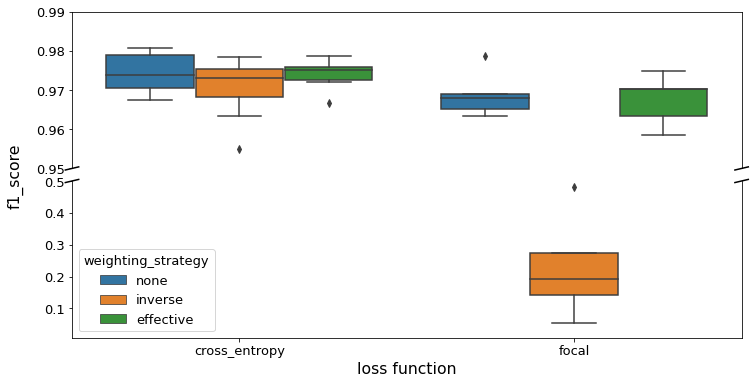

In [ ]:
plt.rc('font', size=13)

order=['cross_entropy', 'focal']

fig, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.08}, figsize=(12, 6))
sns.boxplot(x='loss_function', y='f1_score', hue='weighting_strategy', data=f1_df, order=order,
            ax=ax_top
            #showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black"},
            #hue_order=sorted(f1_df['config'].unique()), order=['none', 'inverse', 'effective']
           )
sns.boxplot(x='loss_function', y='f1_score', hue='weighting_strategy', data=f1_df, order=order,
            ax=ax_bottom)
ax_top.set_ylim(0.95, 0.99)
ax_bottom.set_ylim(top=0.5)

sns.despine(ax=ax_bottom, right=False)
sns.despine(ax=ax_top, bottom=True, right=False, top=False)

ax = ax_top
ax.xaxis.set_visible(False)
ax.set(ylabel=None)
d = .010  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((-d+1, +d+1), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
ax2.set(ylabel=None)
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d+1, +d+1), (1 - d, 1 + d), **kwargs) 
ax2.set_xlabel('loss function', size='large')

xlim = [-0.5, 1.5]
ax_top.set_xlim(xlim)
ax_bottom.set_xlim(xlim)

fig.supylabel('f1_score', size='large', x=0.05)

#remove one of the legends
ax_bottom.legend(title='weighting_strategy', loc='lower left')
ax_top.legend_.remove()

fig.savefig('../figs/glitches/08_compare_focal_v2.pdf', dpi=600)

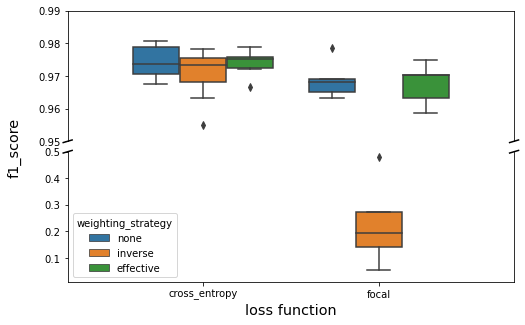

In [ ]:
order=['cross_entropy', 'focal']

fig, (ax_top, ax_bottom) = plt.subplots(ncols=1, nrows=2, sharex=True, gridspec_kw={'hspace':0.08}, figsize=(8, 5))
sns.boxplot(x='loss_function', y='f1_score', hue='weighting_strategy', data=f1_df, order=order,
            ax=ax_top
            #showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black"},
            #hue_order=sorted(f1_df['config'].unique()), order=['none', 'inverse', 'effective']
           )
sns.boxplot(x='loss_function', y='f1_score', hue='weighting_strategy', data=f1_df, order=order,
            ax=ax_bottom)
ax_top.set_ylim(0.95, 0.99)
ax_bottom.set_ylim(top=0.5)

sns.despine(ax=ax_bottom, right=False)
sns.despine(ax=ax_top, bottom=True, right=False, top=False)

ax = ax_top
ax.xaxis.set_visible(False)
ax.set(ylabel=None)
d = .010  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((-d+1, +d+1), (-d, +d), **kwargs)        # top-left diagonal

ax2 = ax_bottom
ax2.set(ylabel=None)
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d+1, +d+1), (1 - d, 1 + d), **kwargs) 
ax2.set_xlabel('loss function', size='x-large')

fig.supylabel('f1_score', size='x-large')

#remove one of the legends
ax_bottom.legend(title='weighting_strategy', loc='lower left')
ax_top.legend_.remove()

fig.savefig('../figs/glitches/08_compare_focal.png', dpi=600)